In [17]:
from astropy.io import fits
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('seaborn-notebook')
import datetime as dt
from astropy.stats import LombScargle

In [3]:
v_df = pd.read_csv('../data/Measurements.csv', index_col='slice')

In [4]:
mags = v_df['Source_AMag_T1']
err = v_df['Source_AMag_Err_T1']
filenames = glob('../data/science/processed/*.FIT')
data = [fits.getdata(file) for file in filenames]
headers = [fits.getheader(file) for file in filenames]
times = [hdr['DATE-OBS'] for hdr in headers]
fmt = '%Y-%m-%dT%H:%M:%S.%f'
times = [dt.datetime.strptime(time, fmt) for time in times]
time_since = []
for i, time in enumerate(times):
    time_since.append((time - times[0]).total_seconds() / 60)
    
t = np.array(time_since)

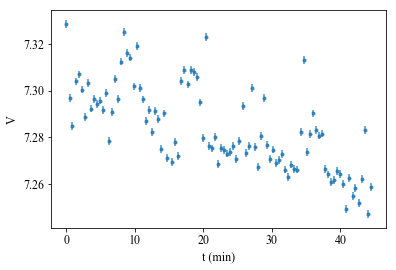

In [36]:
params = {
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'axes.labelsize':12,
    'legend.fontsize':8,
    'font.family':'Times New Roman',
    'font.weight':'normal'
}
matplotlib.rcParams.update(params)

plt.errorbar(t, mags, yerr=err, alpha=0.8,fmt='.')
plt.xlabel('t (min)')
plt.ylabel('V')
plt.savefig('../docs/figs/mags.png')

7.27804463808


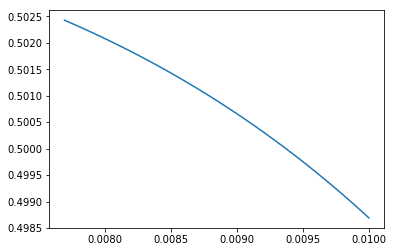

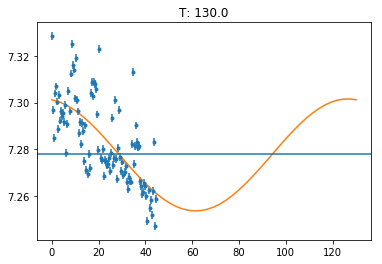

In [18]:
frequency = np.linspace(1./100, 1./130, 100)
power = LombScargle(t, mags, err, nterms=1).power(frequency)
plt.plot(frequency, power)
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1./best_frequency)
y_fit = LombScargle(t, mags, err, nterms=1).model(t_fit, best_frequency)
plt.figure()
plt.errorbar(t, mags, yerr=err, fmt='.')
plt.plot(t_fit, y_fit)
plt.title('T: {}'.format(1./best_frequency))
plt.axhline(y_fit.mean())
print(y_fit.mean())

7.26726745551


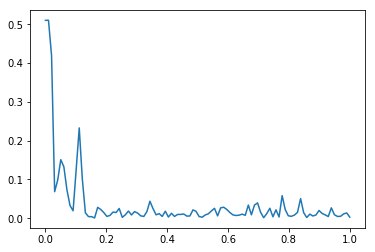

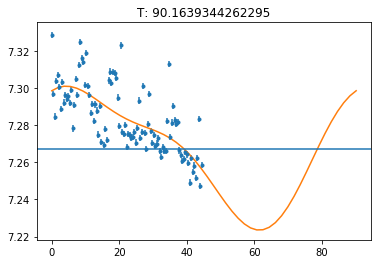

In [24]:
frequency = np.linspace(1/1000, 1, 100)
power = LombScargle(t, mags, err, nterms=2).power(frequency)
plt.plot(frequency, power)
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1/best_frequency)
y_fit = LombScargle(t, mags, err, nterms=2).model(t_fit, best_frequency)
plt.figure()
plt.errorbar(t, mags, yerr=err, fmt='.')
plt.plot(t_fit, y_fit)
plt.title('T: {}'.format(1/best_frequency))
plt.axhline(y_fit.mean())
print(y_fit.mean())

41.6666666667


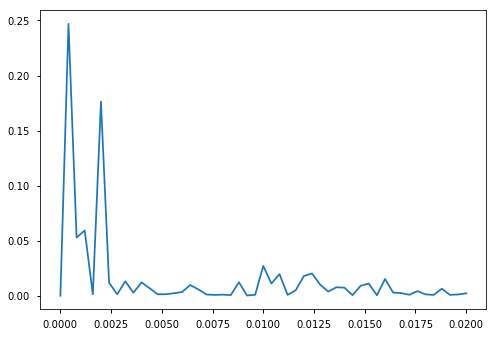

In [23]:
from scipy.signal import periodogram

f, p = periodogram(mags, 1/25)
plt.plot(f, p)
best_per = 1/f[p.argmax()] / 60
print(best_per)

<Container object of 3 artists>

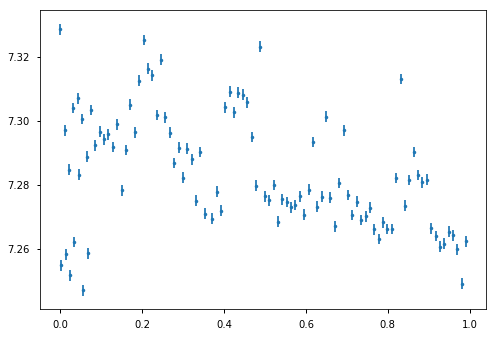

In [25]:
foldTimes = t /(best_per)
foldTimes = foldTimes % 1
plt.errorbar(foldTimes, mags, yerr=err, fmt='.')